<a href="https://colab.research.google.com/github/Mayank01/EVA/blob/master/Session9/Assignment/Assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 9A : Data Augmentation

##GradCam Integration with Cifar10 Dataset Images on 6A model

###Importing and Installing Keras and related core assualts for using in building Neural Network

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
import os
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


###Loading Cifar10 Dataset into training and test Data.

In [2]:
from keras.datasets import cifar10
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


###Analysis of classes present in Dataset and Plot those 10 classes

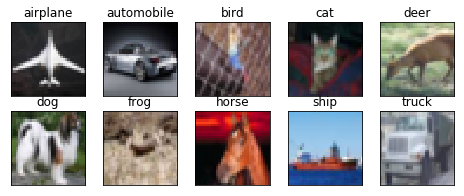

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

###Reusable Method to Plot Model History as Model Accuracy vs Model Loss

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

###Final preprocessing step for the input data is to convert our data type to float32 and normalize our data values to the range

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# Convert 1-dimensional class arrays to 10-dimensional class matrices
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

##Define Model Architechture:

###Compile the Model:
>1. While compile the model we need to declare Loss Function and Optimizer

>2. Here we used Adam and categorical cross entropy as optimizer and loss function respectively

### Preparing Model to store in Google Directory

In [7]:
# Define the model
model = Sequential()
model.add(Convolution2D(64, (3, 3), border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32,(1, 1)))

model.add(Convolution2D(64, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (1, 1)))

model.add(Convolution2D(64, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32,(1, 1)))

model.add(Convolution2D(64, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32,(1, 1)))

model.add(Convolution2D(64, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, border_mode='same'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(Convolution2D(10, (2, 2)))

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Prepare model model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models_Ass_9A')
model_name = 'cifar10_model_Ass_9A_post_marking.hdf5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

W0808 18:53:28.188837 140265625372544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0808 18:53:28.228956 140265625372544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0808 18:53:28.236225 140265625372544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0808 18:53:28.274865 140265625372544 deprecation_wrapper.py:119] From /usr/local/lib/python3.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 128)       512       
__________

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


###Perform below steps to Train Model:
> 1. Image Agumentation.
> 2. Saving Best only Model with checking in every Epochs.
> 3. Fit_generator to Train model incorporate with Best only model to save and Image data Generator.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.w

Epoch 1/100
390/390 [==============================] - 27s 70ms/step - loss: 0.2016 - acc: 0.9282 - val_loss: 0.3000 - val_acc: 0.9047

Epoch 00001: val_acc improved from -inf to 0.90470, saving model to /content/saved_models_Ass_9A/cifar10_model_Ass_9A_post_marking.hdf5
Epoch 2/100
390/390 [==============================] - 26s 66ms/step - loss: 0.1708 - acc: 0.9398 - val_loss: 0.3019 - val_acc: 0.9047

Epoch 00002: val_acc did not improve from 0.90470
Epoch 3/100
390/390 [==============================] - 26s 67ms/step - loss: 0.1570 - acc: 0.9436 - val_loss: 0.3188 - val_acc: 0.9028

Epoch 00003: val_acc did not improve from 0.90470
Epoch 4/100
390/390 [==============================] - 26s 67ms/step - loss: 0.1521 - acc: 0.9466 - val_loss: 0.2979 - val_acc: 0.9092

Epoch 00004: val_acc improved from 0.90470 to 0.90920, saving model to /content/saved_models_Ass_9A/cifar10_model_Ass_9A_post_marking.hdf5
Epoch 5/100
390/390 [==============================] - 26s 67ms/step - loss: 0.14

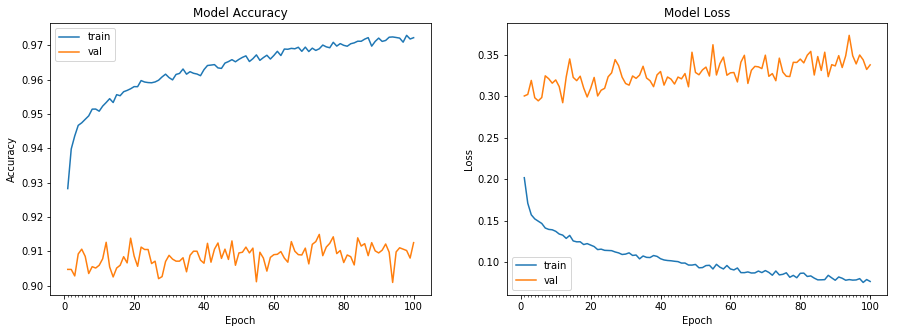

Accuracy on test data is: 91.25


In [24]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1,
                                 callbacks=[checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

###Tried Learning Rate Scheduler with changing of Every epochs. Not trained as taking lot of Time

In [0]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint 
from keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 64
EPOCHS = 50

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, rotation_range=20, horizontal_flip=True)
#datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=False)
datagen.fit(train_features)

train_flow = datagen.flow(train_features, train_labels, batch_size=BATCH_SIZE)
valid_flow = datagen.flow(test_features, test_labels, batch_size=BATCH_SIZE, shuffle=False)

STEP_SIZE_TRAIN=train_flow.n//train_flow.batch_size
STEP_SIZE_VALID=valid_flow.n//valid_flow.batch_size

def scheduler(epoch, lr):
  return round(0.007 * 1/(1 + 0.319 * epoch), 10)
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_acc', verbose=1, save_best_only=True)

# train the model
start = time.time()

# Train the model
model_info = model.fit_generator(train_flow,
                                 nb_epoch = EPOCHS,
                                 steps_per_epoch=STEP_SIZE_TRAIN,
                                 validation_data = valid_flow,
                                 validation_steps=STEP_SIZE_VALID,
                                 callbacks=[checkpoint, LearningRateScheduler(scheduler, verbose=1)])
#content/gdrive/My Drive/SOAI/EVA/Session9
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

###Steps Involve to Download Model in Google Drive and loading from Drive

In [25]:
!pip install -U -q PyDrive
!pip install h5py pyyaml
!git clone https://gist.github.com/dc7e60aa487430ea704a8cb3f2c5d6a6.git /tmp/colab_util_repo
!mv /tmp/colab_util_repo/colab_util.py colab_util.py 
!rm -r /tmp/colab_util_repo
from colab_util import *
drive_handler = GoogleDriveHandler()

Cloning into '/tmp/colab_util_repo'...
remote: Enumerating objects: 40, done.
remote: Total 40 (delta 0), reused 0 (delta 0), pack-reused 40
Unpacking objects: 100% (40/40), done.


###Upload Model to Drive Location with Mount drive in Colab

In [27]:
drive_handler.upload('../content/saved_models_Ass_9A/cifar10_model_Ass_9A_post_marking.hdf5', parent_path='/SOAI/EVA/Session9')

'1k9MYQJ7f9mgxEEfePq99GNO5llGiyOnb'

###Download Model from Mounted Colab location to Google Drive location

In [0]:
drive_handler.download('cifar10_model_Ass_9A_post_marking.hdf5', target_path='/SOAI/EVA/Session9/cifar10_model_Ass_9A_post_marking.hdf5')

###Load Saved Pre-trained Model after Mounting Drive in Colab

In [32]:
from keras.models import load_model
#content/drive/My Drive/SOAI/EVA/Session9/cifar10_model_Ass_9A.hdf5
model = load_model('/content/drive/My Drive/SOAI/EVA/Session9/cifar10_model_Ass_9A_post_marking.hdf5')
score = model.evaluate(test_features, test_labels, verbose=0)
y_pred = model.predict(test_features)
print(score)

[0.318435284001939, 0.9149]


###Here we can see validation Accuracy 91.49%, so to achieve our objective lets first gets misclassified images index. 

In [0]:
y_pred = model.predict(test_features)
# getting index of all misclasified images
img_index = []
for i in range(1,test_labels.shape[0]):
  if np.argmax(y_pred[i])!=np.argmax(test_labels[i]):
    img_index.append(i)

### Now Lets apply image reconstruction and plot 12 misclassified images.

In [0]:
def image_reconstract(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x
  
# Storing 12 misclassified images into a variable after converting them  into 0-255 scale. Also, storing actual and predicted output values for those images
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
img_actual = [] 
img_actual_value = []
img_pred_value = []
for i in range(1,13):
    img_req = np.array(test_features[img_index[i-1]]).astype(np.float64)
    img_req = image_reconstract(img_req)
    img_actual.append(img_req)
    img_actual_value.append(class_names[np.argmax(test_labels[img_index[i-1]])])
    img_pred_value.append(class_names[np.argmax(y_pred[img_index[i-1]])])

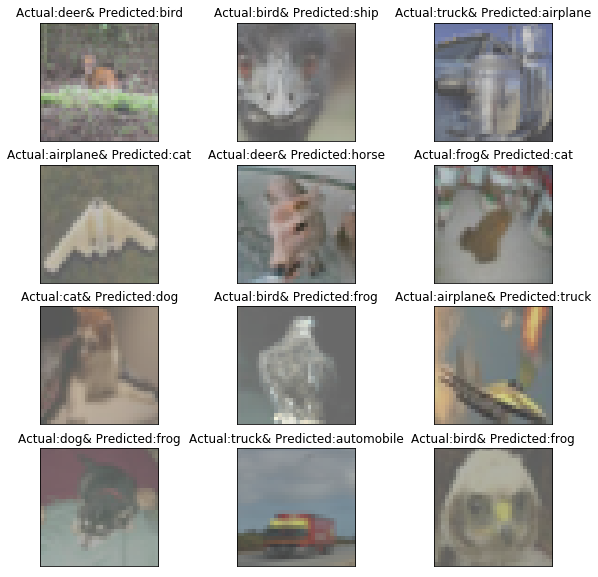

In [35]:
# Plotting all 12 images    
row = 4
col = 3
fig=plt.figure(figsize=(10, 10))
for i in range(0,row*col):
  fig.add_subplot(row,col,i+1)
  plt.imshow(img_actual[i]) 
  plt.title('Actual:'+str(img_actual_value[i])+'& Predicted:'+str(img_pred_value[i]))
  plt.xticks([])
  plt.yticks([])
plt.show() 

###Our second Objective to Integrate Misclassified images with GradCam, let's create method for GradCam

In [0]:
def image_reconstract(x):
  # normalize tensor: center on 0., ensure std is 0.1
  x -= x.mean()
  x /= (x.std() + 1e-5)
  x *= 0.1

  # clip to [0, 1]
  x += 0.5
  x = np.clip(x, 0, 1)

  # convert to RGB array
  x *= 255
  #x = x.transpose((1, 2, 0))
  x = np.clip(x, 0, 255).astype('uint8')
  return x
  
import cv2 
def applygradCAM(image):
  # expanding dimension for prediction
  x = np.expand_dims(image, axis=0)
  
  # prediction of the image
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  
  # Getting the output of the last convolutional layer 
  last_conv_layer = model.get_layer("conv2d_14")
  
  # Claculating the gradients
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(128):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  
  # Creating the heatmap
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap) 
  
  # Resize heatmap to original image size
  heatmap = cv2.resize(heatmap, (x.shape[1], x.shape[2]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  
  # Creating the superimposed Image
  superimposed_img = cv2.addWeighted(image_reconstract(image), 0.6, heatmap, 0.4, 0)
  return superimposed_img

###Let's Apply GradCam on 10 Misclassfied Images

In [37]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(12,4))

img_gradCam = [] 
img_actual_value = []
img_pred_value = []
for i in range(1,11):
    img_req_grad = applygradCAM(test_features[img_index[i-1]])
    img_gradCam.append(img_req_grad)
    img_actual_value.append(class_names[np.argmax(test_labels[img_index[i-1]])])
    img_pred_value.append(class_names[np.argmax(y_pred[img_index[i-1]])])

<Figure size 864x288 with 0 Axes>

###Let's Plot GradCam Integrated Misclassified Images

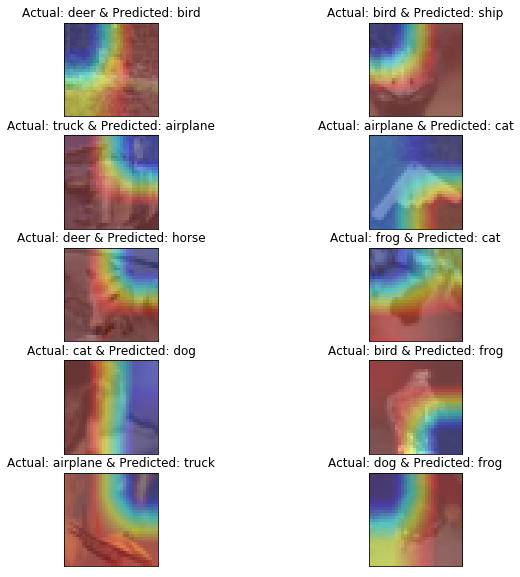

In [38]:
# Plotting all 10 images    
row = 5
col = 2
fig=plt.figure(figsize=(10, 10))
for i in range(0,row*col):
  fig.add_subplot(row,col,i+1)
  plt.imshow(img_gradCam[i]) 
  plt.title('Actual: '+str(img_actual_value[i])+' & Predicted: '+str(img_pred_value[i]))
  plt.xticks([])
  plt.yticks([])
plt.show() 

##Assignment 9B

### Integrate GradCam with same Misclassified Image but these time Trained with ***CutOuts***

In [0]:
import numpy as np

def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

## : Assigment 9B- Add CutOut and re-train 6A model

###Steps Involved to train Model:
>1. Create Directory path to save best model in drive.
>2. Implemented Defualt Image Agumentation.
>3. Created Checkpoints to save Best Model.
>4.  Added CutOuts in Image Generator.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`


Epoch 1/100
390/390 [==============================] - 32s 83ms/step - loss: 0.4080 - acc: 0.8661 - val_loss: 1.9792 - val_acc: 0.4704

Epoch 00001: val_acc improved from -inf to 0.47040, saving model to /content/saved_models_Ass_9B/cifar10_model_Ass_9B_post_marking.hdf5
Epoch 2/100
390/390 [==============================] - 28s 72ms/step - loss: 0.3182 - acc: 0.8905 - val_loss: 1.8437 - val_acc: 0.5218

Epoch 00002: val_acc improved from 0.47040 to 0.52180, saving model to /content/saved_models_Ass_9B/cifar10_model_Ass_9B_post_marking.hdf5
Epoch 3/100
390/390 [==============================] - 28s 72ms/step - loss: 0.2921 - acc: 0.8983 - val_loss: 1.6840 - val_acc: 0.5304

Epoch 00003: val_acc improved from 0.52180 to 0.53040, saving model to /content/saved_models_Ass_9B/cifar10_model_Ass_9B_post_marking.hdf5
Epoch 4/100
390/390 [==============================] - 28s 73ms/step - loss: 0.2802 - acc: 0.9029 - val_loss: 1.5054 - val_acc: 0.5686

Epoch 00004: val_acc improved from 0.53040

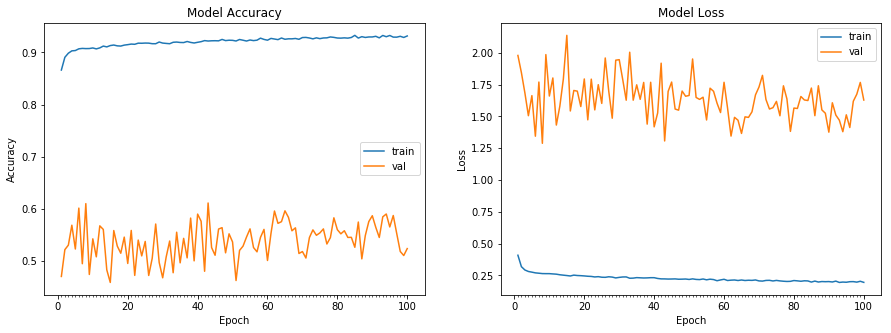

Accuracy on test data is: 52.38


In [40]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import numpy as np
import os

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Prepare model model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models_Ass_9B')
model_name = 'cifar10_model_Ass_9B_post_marking.hdf5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=True))

# Compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(train_features)
    
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1,
                                 callbacks=[checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

###Google Authetication to get Access to Google drive to load model in drive

In [41]:
!pip install -U -q PyDrive
!pip install h5py pyyaml
!git clone https://gist.github.com/dc7e60aa487430ea704a8cb3f2c5d6a6.git /tmp/colab_util_repo
!mv /tmp/colab_util_repo/colab_util.py colab_util.py 
!rm -r /tmp/colab_util_repo
from colab_util import *
drive_handler = GoogleDriveHandler()

Cloning into '/tmp/colab_util_repo'...
remote: Enumerating objects: 40, done.
remote: Total 40 (delta 0), reused 0 (delta 0), pack-reused 40
Unpacking objects: 100% (40/40), done.


In [45]:
drive_handler.upload('../content/saved_models_Ass_9B/cifar10_model_Ass_9B_post_marking.hdf5', parent_path='/SOAI/EVA/Session9')

'1RA-50pkuo4zcop0LRIsvbIm1axip1MHR'

In [0]:
drive_handler.download('cifar10_model_Ass_9B_post_marking.hdf5', target_path='/SOAI/EVA/Session9/cifar10_model_Ass_9B_post_marking.hdf5')

###Mounted Google Drive to Load pre-trained Model with CutOuts.

In [48]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [51]:
from keras.models import load_model
#content/drive/My Drive/SOAI/EVA/Session9/cifar10_model_Ass_9A.hdf5
model = load_model('/content/drive/My Drive/SOAI/EVA/Session9/cifar10_model_Ass_9B_post_marking.hdf5')
score = model.evaluate(test_features, test_labels, verbose=0)
y_pred = model.predict(test_features)
print(score)

[1.3067548727035523, 0.6112]


###Apply GradCam on Pre-trained Model using CutOuts

In [52]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(12,4))

img_gradCam = [] 
img_actual_value = []
img_pred_value = []
for i in range(1,13):
    img_req_grad = applygradCAM(test_features[img_index[i-1]]).astype(np.float64)
    img_req_grad = image_reconstract(img_req_grad)
    img_gradCam.append(img_req_grad)
    img_actual_value.append(class_names[np.argmax(test_labels[img_index[i-1]])])
    img_pred_value.append(class_names[np.argmax(y_pred[img_index[i-1]])])

<Figure size 864x288 with 0 Axes>

###Plotting 12 Images as Integration of GradCam and CutOuts

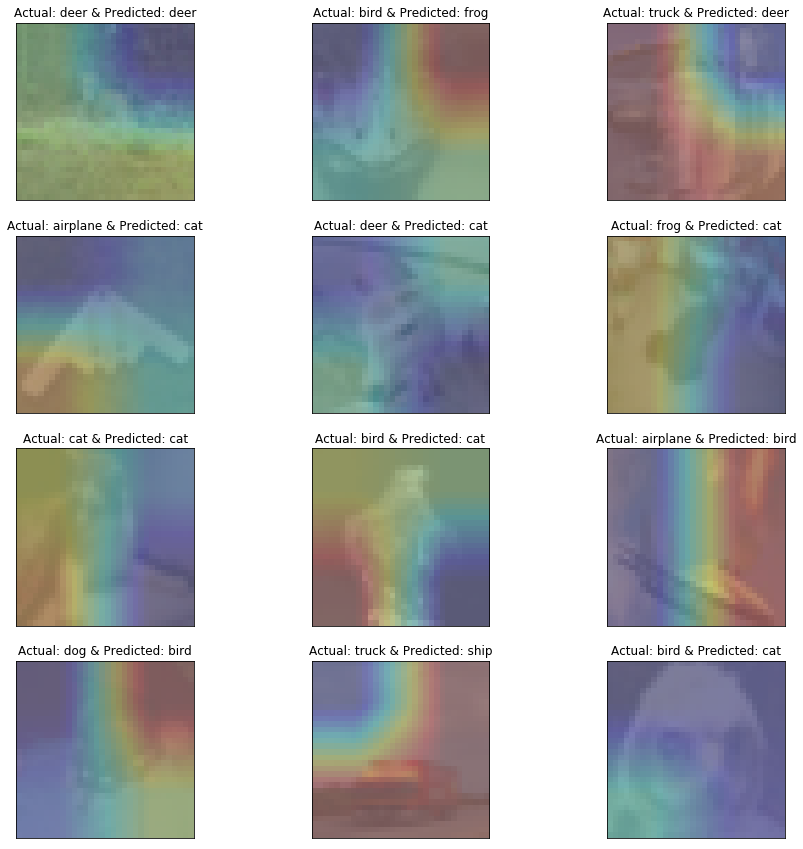

In [53]:
# Plotting all 12 images    
row = 4
col = 3
fig=plt.figure(figsize=(15, 15))
for i in range(0,row*col):
  fig.add_subplot(row,col,i+1)
  plt.imshow(img_gradCam[i]) 
  plt.title('Actual: '+str(img_actual_value[i])+' & Predicted: '+str(img_pred_value[i]))
  plt.xticks([])
  plt.yticks([])
plt.show() 